In [ ]:
!pip install opencv-python

In [2]:
import os
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
test_img_path = 'mobile captures\\' + 'test.jpg'

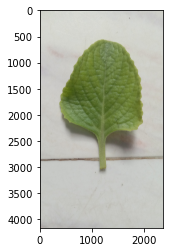

In [4]:
main_img = cv2.imread(test_img_path)
img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
plt.imshow(img,cmap="Greys_r")

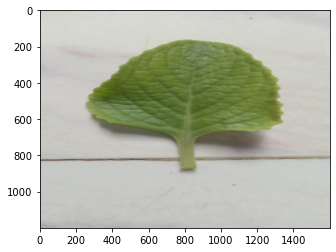

In [8]:
resized_image = cv2.resize(img, (1600, 1200))
plt.imshow(resized_image,cmap="Greys_r")

In [9]:
y,x,_ = img.shape

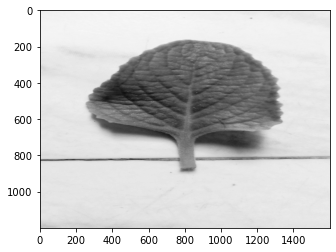

In [10]:
gs = cv2.cvtColor(resized_image,cv2.COLOR_RGB2GRAY)
plt.imshow(gs,cmap="Greys_r")

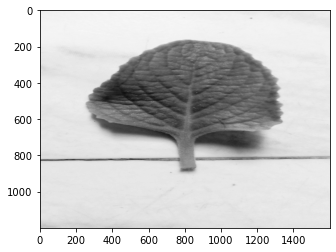

In [11]:
gs = cv2.cvtColor(resized_image,cv2.COLOR_RGB2GRAY)
plt.imshow(gs,cmap="Greys_r")

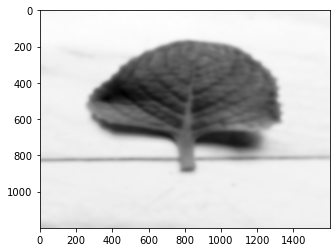

In [12]:
blur = cv2.GaussianBlur(gs, (55,55),0)
plt.imshow(blur,cmap="Greys_r")

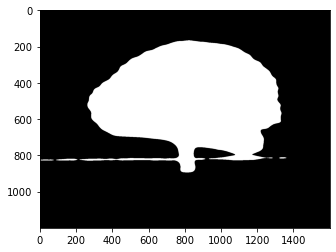

In [13]:
ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(im_bw_otsu,cmap='Greys_r')

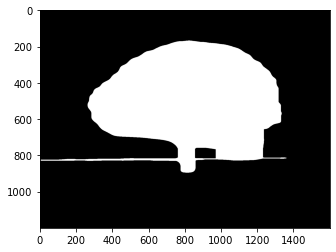

In [14]:
kernel = np.ones((50,50),np.uint8)
closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing,cmap="Greys_r")

In [15]:
contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [16]:
len(contours)

2

In [17]:
def find_contour(cnts):
    contains = []
    y_ri,x_ri, _ = resized_image.shape
    for cc in cnts:
        yn = cv2.pointPolygonTest(cc,(x_ri//2,y_ri//2),False)
        contains.append(yn)

    val = [contains.index(temp) for temp in contains if temp>0]
    print(contains)
    return val[0]

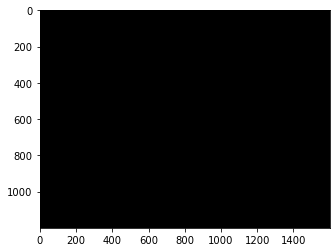

In [18]:
black_img = np.empty([1200,1600,3],dtype=np.uint8)
black_img.fill(0)
plt.imshow(black_img,cmap="Greys_r")

[1.0, -1.0]


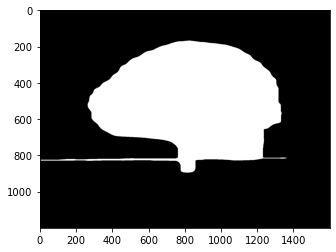

In [19]:
index = find_contour(contours)
cnt = contours[index]
mask = cv2.drawContours(black_img, [cnt] , 0, (255,255,255), -1)
plt.imshow(mask)

In [20]:
maskedImg = cv2.bitwise_and(resized_image, mask)

In [21]:
white_pix = [255,255,255]
black_pix = [0,0,0]

final_img = maskedImg
h,w,channels = final_img.shape
for x in range(0,w):
    for y in range(0,h):
        channels_xy = final_img[y,x]
        if all(channels_xy == black_pix):    
            final_img[y,x] = white_pix

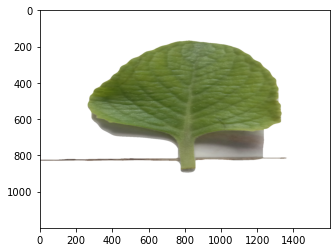

In [23]:
plt.imshow(final_img)